#### 1. Import Necessary Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### 2. Load and Preprocess the Data:

In [4]:
# Load dataset
url = 'creditcard.csv'
df = pd.read_csv(url)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


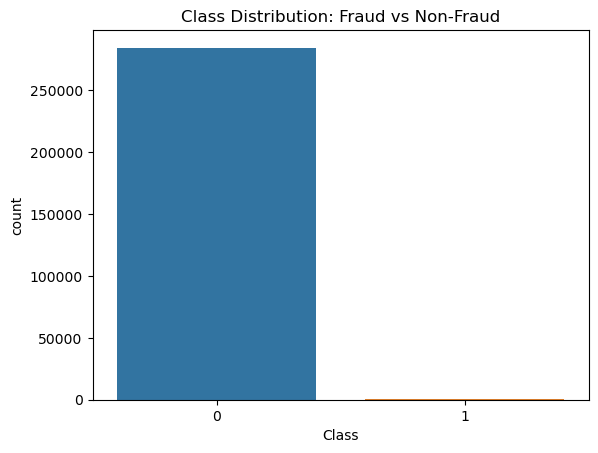

In [7]:
# Check the distribution of the 'Class' (Fraud/Non-fraud)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()

In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  

In [9]:
# Scale the features using StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 3. Split the Data:

In [10]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#### 4. Train Multiple Machine Learning Models:

In [11]:
# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [12]:
# Train a Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

In [13]:
# Train a Neural Network model (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [14]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
# Train a Support Vector Machine (SVM) model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#### 5. Evaluate Models:

In [16]:
# Evaluate Logistic Regression
print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    13]
 [   34    64]]


In [17]:
# Evaluate Decision Tree Classifier
print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56840    24]
 [   25    73]]


In [18]:
# Evaluate Neural Network (MLP)
print('Neural Network (MLP):')
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))

Neural Network (MLP):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56846    18]
 [   17    81]]


In [19]:
# Evaluate Random Forest
print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     5]
 [   18    80]]


In [20]:
# Evaluate SVM
print('Support Vector Machine (SVM):')
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.79      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56843    21]
 [   21    77]]


#### 6. Visualizations:

In [22]:
# Confusion Matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

##### Plot confusion matrices

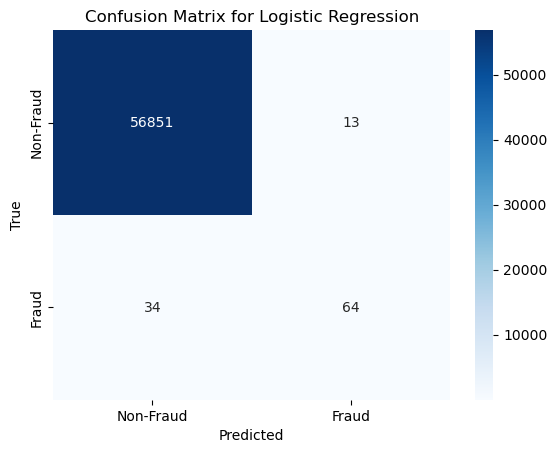

In [23]:
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

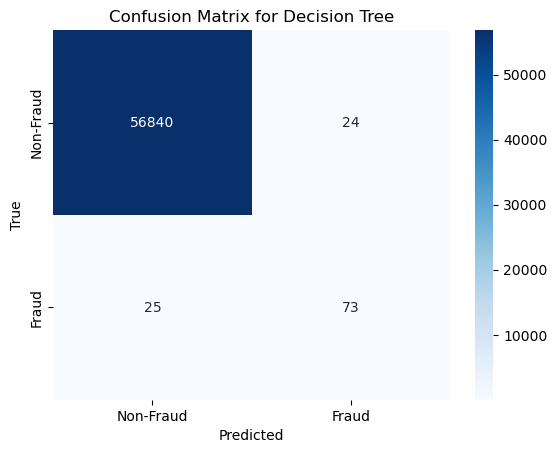

In [24]:
plot_confusion_matrix(y_test, y_pred_dtree, 'Decision Tree')

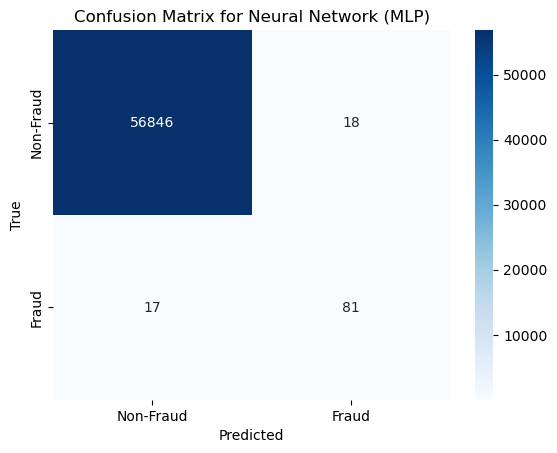

In [25]:
plot_confusion_matrix(y_test, y_pred_mlp, 'Neural Network (MLP)')

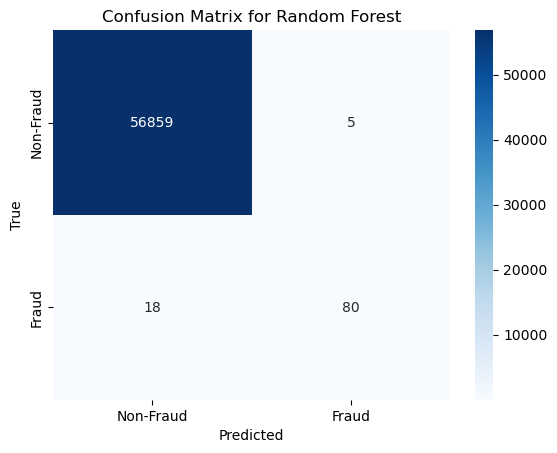

In [26]:
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

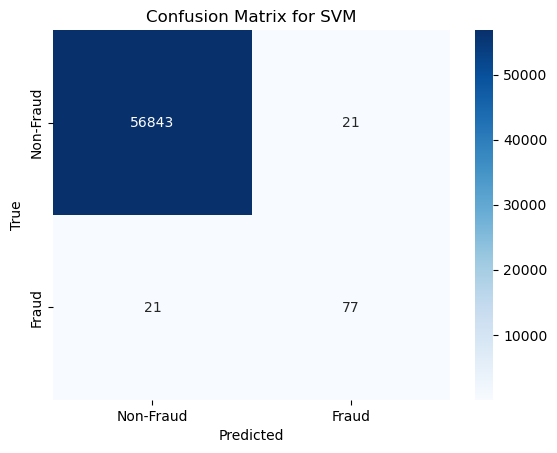

In [27]:
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

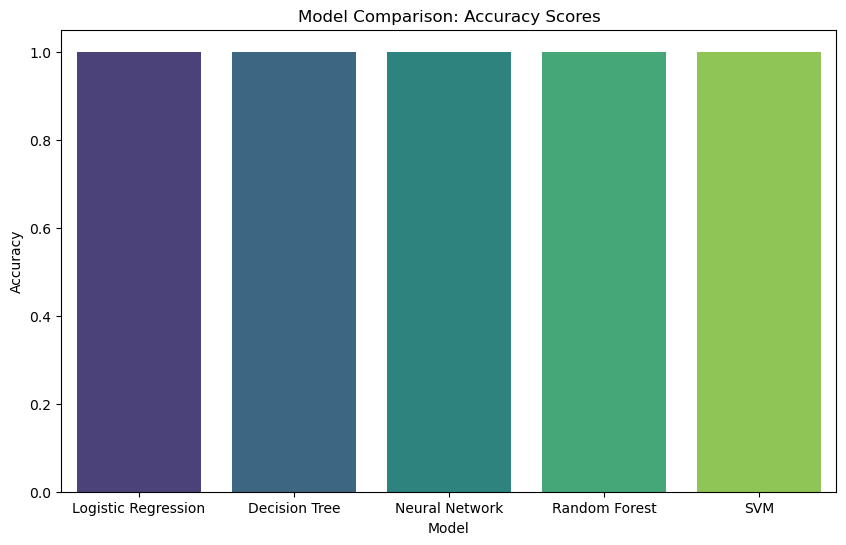

In [28]:
# Model Comparison: Plotting accuracy of all models
models = ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_dtree),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

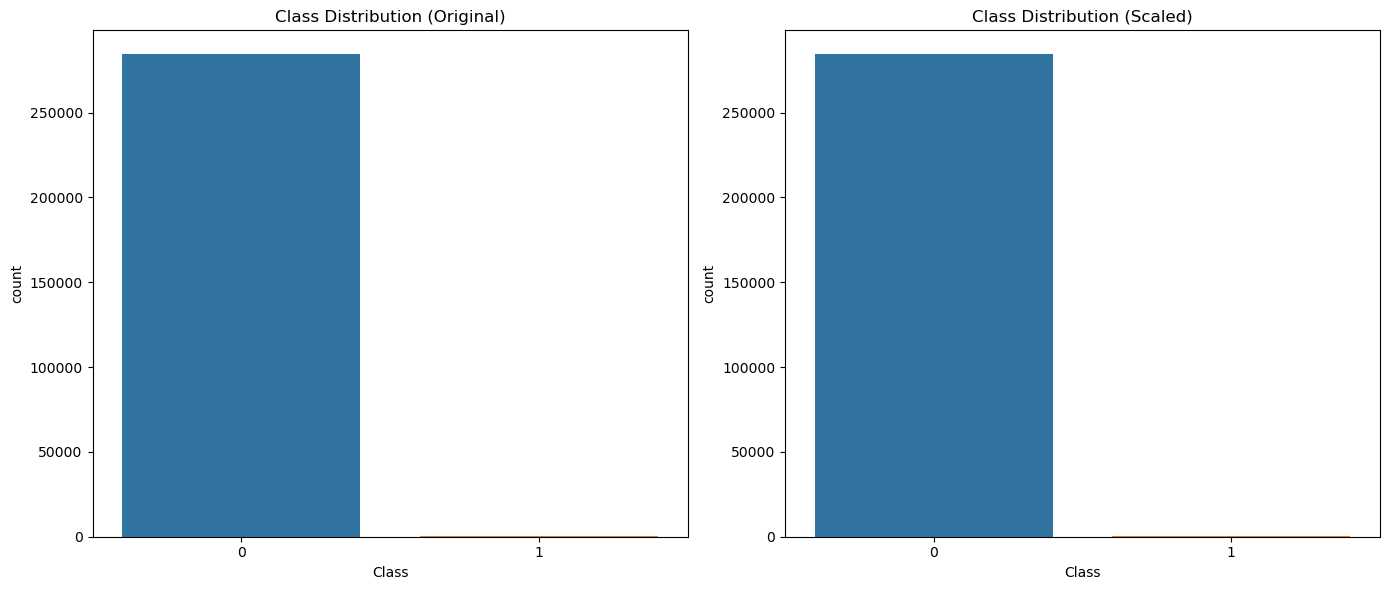

In [29]:
# Visualize class distribution before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before scaling
sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_title('Class Distribution (Original)')

# After scaling (Check for class imbalance)
sns.countplot(x='Class', data=df, ax=axes[1])
axes[1].set_title('Class Distribution (Scaled)')

plt.tight_layout()
plt.show()

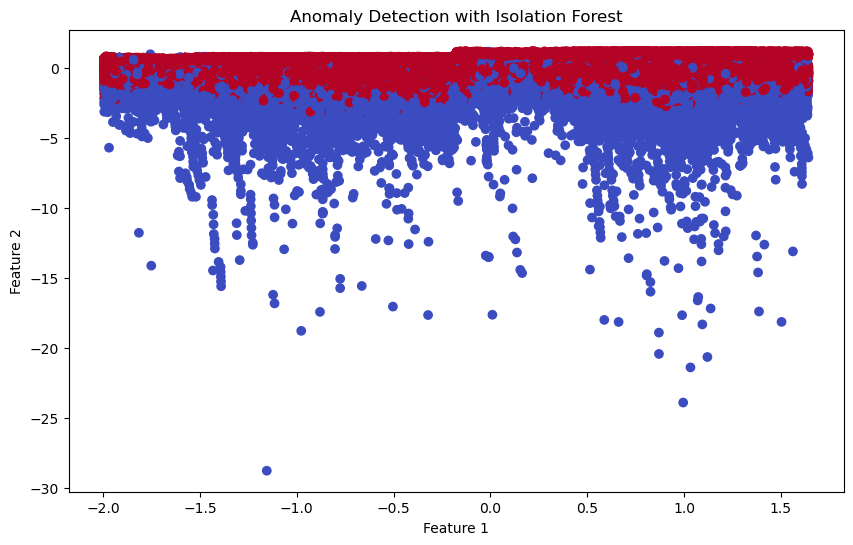

In [30]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X_train)

# Plot the outliers vs. normal points
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=outliers, cmap='coolwarm')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()